In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [16]:
(x_train_data, t_train_data), (x_test_data, t_test_data) = mnist.load_data()
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
print(x_train_data[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

<function matplotlib.pyplot.show(close=None, block=None)>

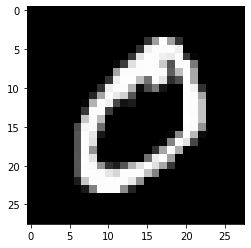

In [18]:
img = x_train_data[1]
plt.imshow(img, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

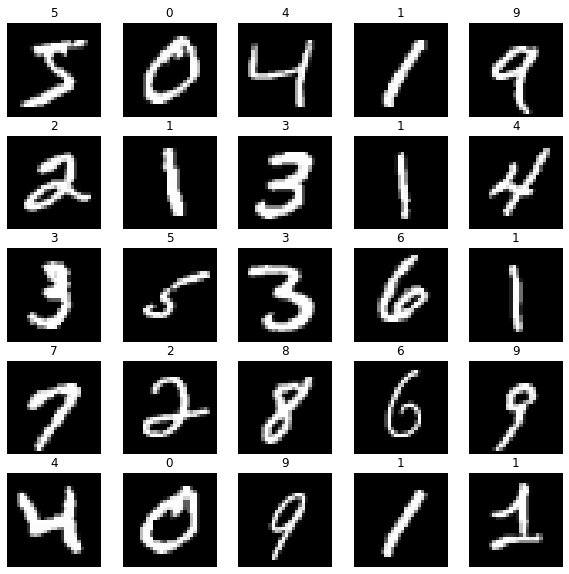

In [19]:
plt.figure(figsize=(10, 10))  # 단위 : 인치(크기는 10인치, 10인치)
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show

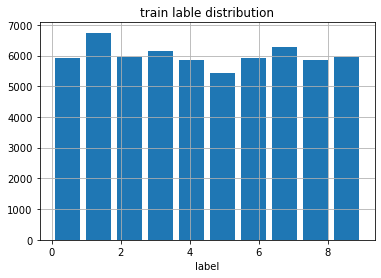

In [20]:
plt.title('train lable distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data, bins=10, rwidth=0.8)
plt.show()

In [21]:
label_list = np.zeros(10)
for idx in range(len(t_train_data)):
    label = int(t_train_data[idx])
    label_list[label] += 1
label_list  # data 갯수

array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
       5949.])

In [22]:
# image data 정규화 작업(overflow 방지)
x_train = (x_train_data - 0.0) / (255.0 - 0.0)
x_test = (x_test_data - 0.0) / (255.0 - 0.0)
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
t_train_data[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [24]:
# one hot encoding
t_train = tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [25]:
t_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8005 - accuracy: 0.8023 - val_loss: 0.3918 - val_accuracy: 0.8952
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3450 - accuracy: 0.9072 - val_loss: 0.3027 - val_accuracy: 0.9153
Epoch 3/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2814 - accuracy: 0.9226 - val_loss: 0.2640 - val_accuracy: 0.9268
Epoch 4/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2461 - accuracy: 0.9317 - val_loss: 0.2397 - val_accuracy: 0.9333
Epoch 5/50
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2204 - accuracy: 0.9386 - val_loss: 0.2212 - val_accuracy: 0.9391
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2004 - accuracy: 0.9443 - val_loss: 0.2062 - val_accuracy: 0.9433
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1834 - accuracy: 0.9487 - val_loss: 0.1944 - val_accuracy:

In [29]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 941us/step - loss: 0.0838 - accuracy: 0.9758


[0.0838330015540123, 0.9757999777793884]

In [30]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 828us/step


In [33]:
print(predictions[0])
print('='*50)
print(t_test[0])

[1.7313256e-07 9.9900010e-10 6.6571280e-05 1.6855302e-03 1.0402565e-10
 8.9470497e-08 4.6238972e-12 9.9820089e-01 1.6086369e-06 4.4991019e-05]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [35]:
label = np.argmax(predictions[0])
label

7

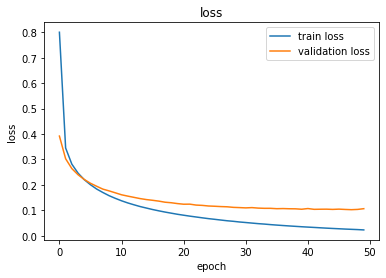

In [37]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')  # 범례를 최적의 위치에 알아서 위치시켜 줌
plt.show()

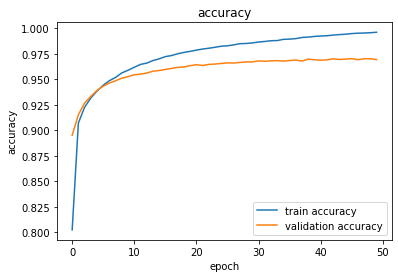

In [38]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()

[[ 970    0    1    1    1    2    2    1    1    1]
 [   0 1126    4    0    0    1    1    1    2    0]
 [   6    4 1007    1    2    0    3    5    4    0]
 [   0    1    5  989    0    5    0    5    4    1]
 [   1    0    4    0  959    0    3    3    2   10]
 [   3    0    0    6    1  866    8    2    4    2]
 [   4    3    2    1    5    3  937    0    3    0]
 [   1    6   12    2    0    1    0  998    1    7]
 [   2    2    5    7    5    5    2    6  933    7]
 [   4    6    0    7    9    2    0    7    1  973]]


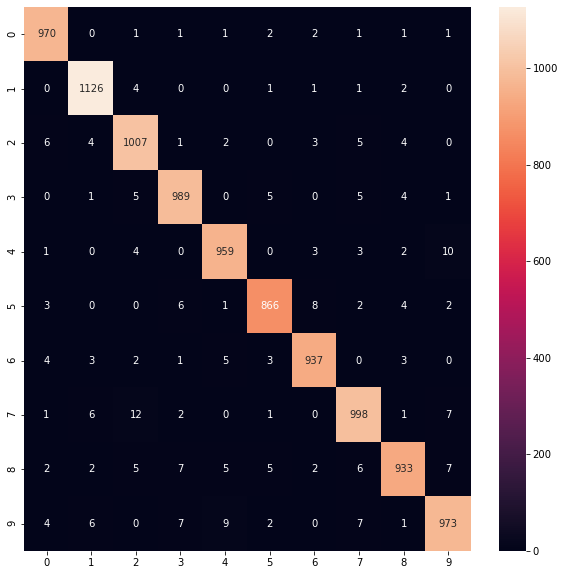

In [44]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predictions, axis=-1))

print(cm)
print('='*50)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()